In [2]:
import pandas as pd 

df = pd.read_excel(r'D:\Grenoble_university\6_month_internship\working space\data\flex_indicator_general.xlsx', sheet_name='Indicators', skiprows=3, na_values='')

df = df.dropna(how='all')


power = df.iloc[0]
flexibility = df.iloc[2]
energy = df.iloc[1]

max_flexible_power = 0
max_non_flexible_power = 0
max_flexible_energy=0
max_non_flexible_energy=0

# Loop through each column in the DataFrame
for column in df.columns:
    # Check if the flexibility for the current appliance is 'Yes'
    if flexibility[column] == 'Yes':
        # Sum the power for flexible appliances
        max_flexible_power += power[column]
    elif flexibility[column] == 'No':
        # Sum the power for non-flexible appliances
        max_non_flexible_power += power[column]
    if flexibility[column] == 'Yes':
        max_flexible_energy += energy[column]
    elif flexibility[column] == 'No':
        max_non_flexible_energy +=energy[column]

print("Total power consumption for flexible appliances:", max_flexible_power, 'W')
print("Total power consumption for non-flexible appliances:", max_non_flexible_power, 'W')
print("Total energy consumption for flexible appliances during a year:", max_flexible_power, 'KW')
print("Total energy consumption for non-flexible appliances during a year:", max_non_flexible_power, 'KW')

Total power consumption for flexible appliances: 20270 W
Total power consumption for non-flexible appliances: 9940 W
Total energy consumption for flexible appliances during a year: 20270 KW
Total energy consumption for non-flexible appliances during a year: 9940 KW


In [3]:
Power_indicator_flex_power=max_flexible_power/(max_flexible_power+max_non_flexible_power)
Power_indicator_flex_energy=max_flexible_energy/(max_flexible_energy+max_non_flexible_energy)

print('Time independent indicator = ', Power_indicator_flex_power)
print('Time dependent indicator = ', Power_indicator_flex_energy)


Time independent indicator =  0.6709698775239987
Time dependent indicator =  0.26380568961753936


In [4]:
df

,appliances,Dish washer,Chest freezer,Fridge freezer,Vertical freezer,Electric oven,Electric Cooker,Microwave oven,TV,Hot plate,...,Computer site,Power supply for wood boiler,Heat pump,Water pump,Washing machine+clothes drier,Power supply for gas boiler,Electric deep frier,Heat pump water heater,Power supply for wall boiler,No-frost fridge
0,average appliance power [W],1200,200,400,500,2500,1300,1100,100,2000,...,70,30,5475,750,3000,200,1000,550,200,450
1,Annual energy spent [kWh/year],438,1460,2920,3650,912.5,474.5,100.375,146,730,...,127.75,262.8,13550.625,1916.25,3285,1752,30.416667,200.75,1752,3942
2,Flexible Yes / No,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,...,Yes,No,No,Yes,Yes,No,Yes,Yes,No,No


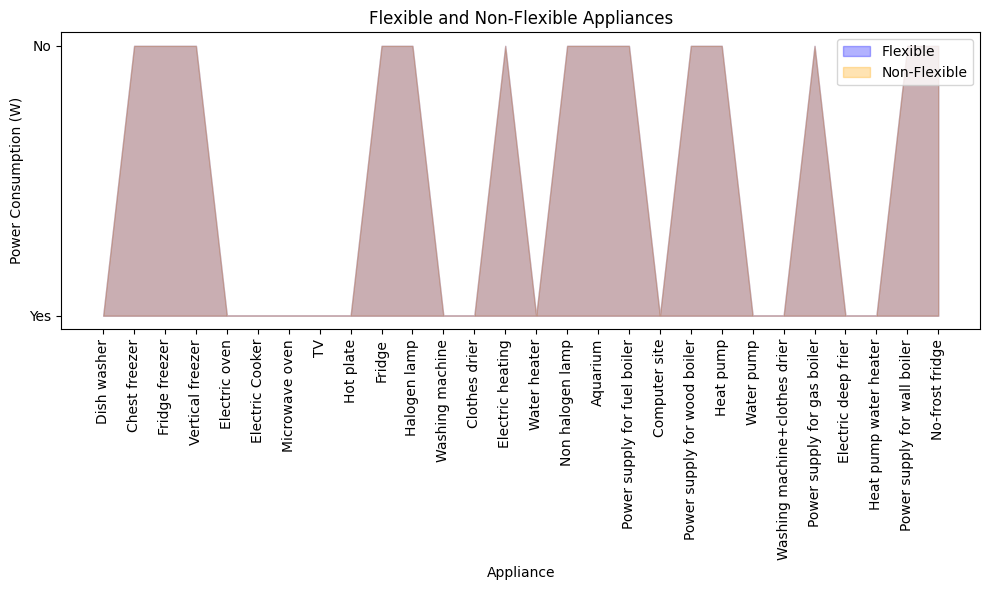

In [5]:
import pandas as pd
import matplotlib.pyplot as plt



# Convert the power consumption data to numeric
df.iloc[0, 1:] = pd.to_numeric(df.iloc[0, 1:], errors='coerce')

# Separate flexible and non-flexible appliances
flexible = df.loc[df.iloc[:, 0] == 'Flexible Yes / No']
non_flexible = df.loc[df.iloc[:, 0] == 'Flexible Yes / No']

# Plotting
plt.figure(figsize=(10, 6))

# Plot flexible appliances
plt.fill_between(df.columns[1:], 0, flexible.iloc[0, 1:], color='blue', alpha=0.3, label='Flexible')

# Plot non-flexible appliances
plt.fill_between(df.columns[1:], 0, non_flexible.iloc[0, 1:], color='orange', alpha=0.3, label='Non-Flexible')

# Customize plot
plt.xticks(rotation=90)
plt.xlabel('Appliance')
plt.ylabel('Power Consumption (W)')
plt.title('Flexible and Non-Flexible Appliances')
plt.legend()
plt.tight_layout()

# Show plot
plt.show()




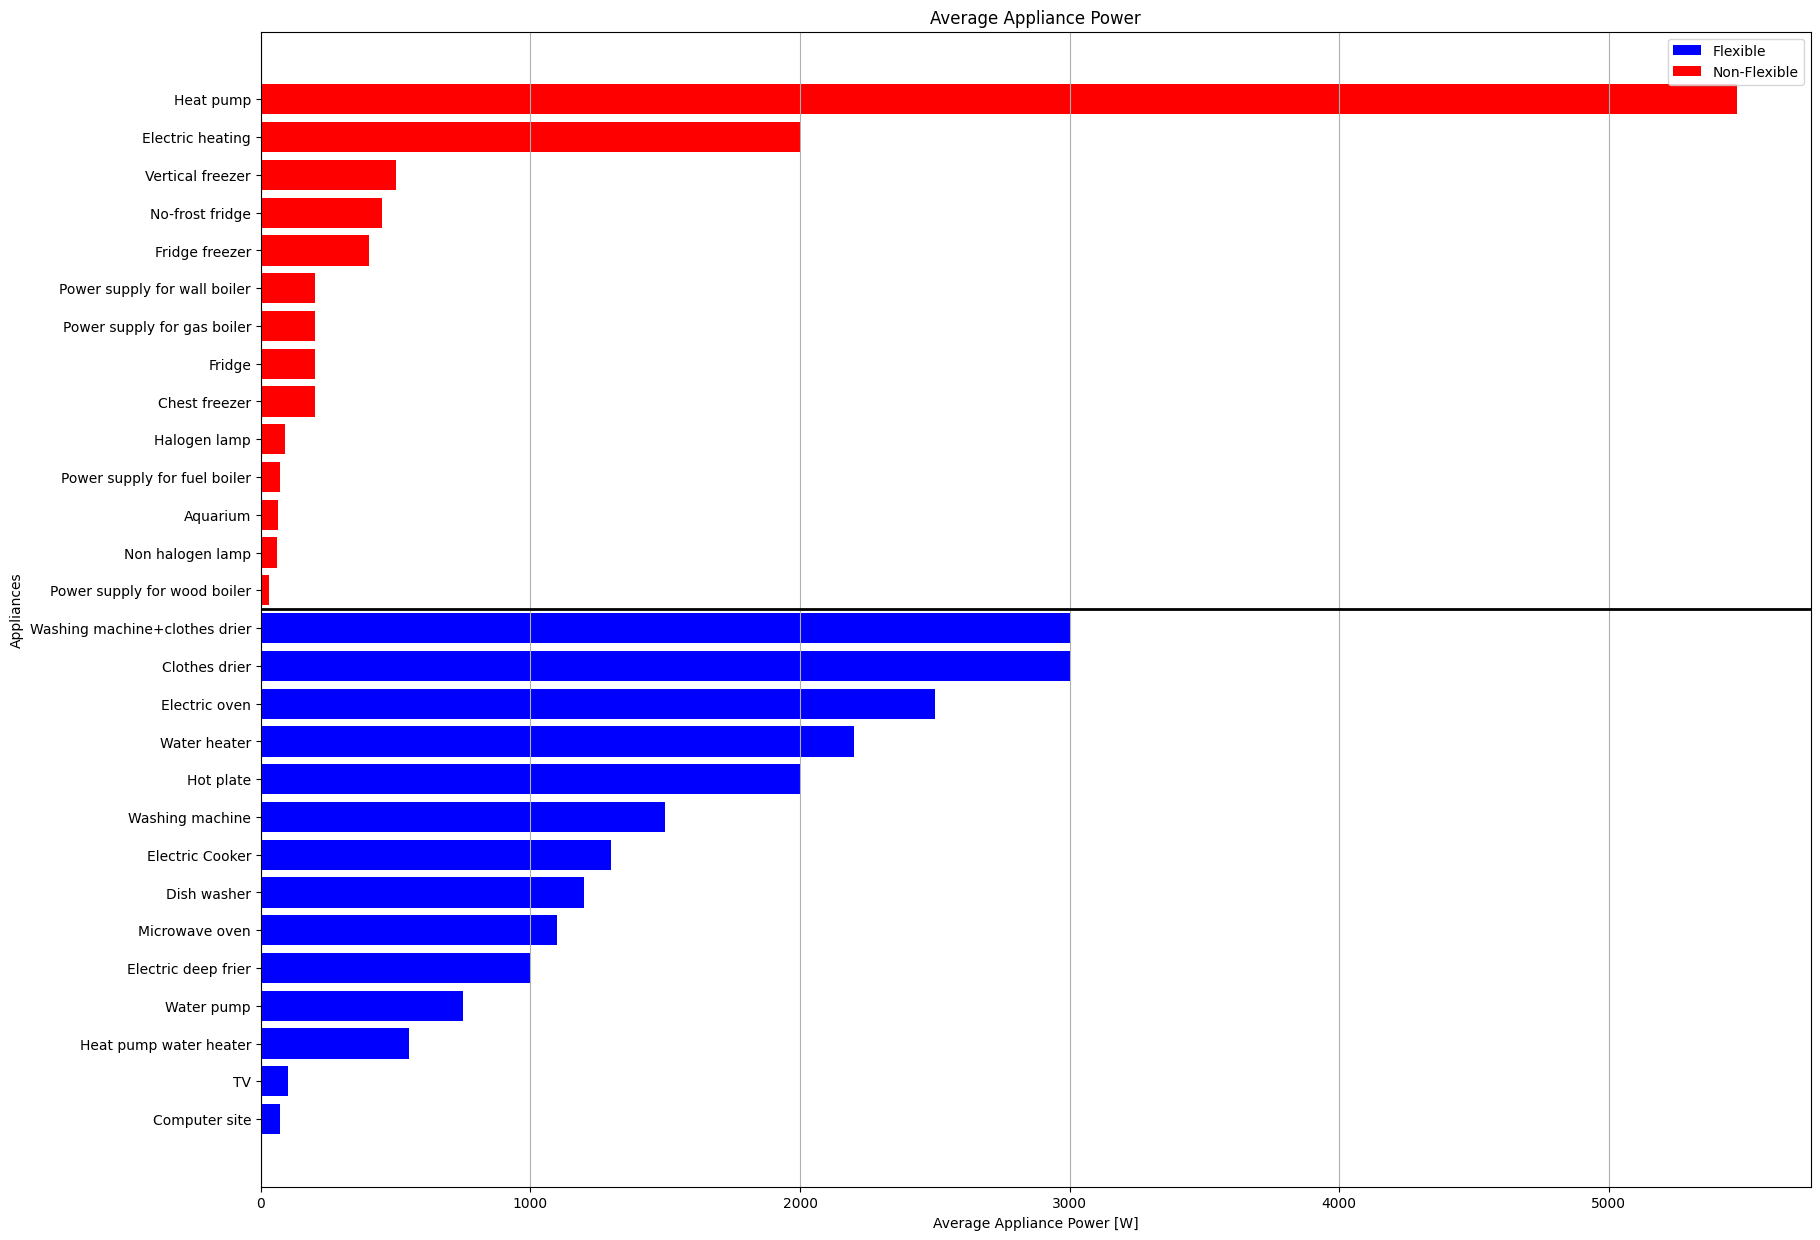

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


# Drop rows with all NaN values
df = df.dropna(how='all')

# Extract relevant data
appliances = df.columns[1:]  # Exclude the first column
power = df.iloc[0][1:].astype(float)  # Exclude the first value and convert power values to float

# Extract flexibility data
flexibility = df.iloc[2][1:]

# Define colors based on flexibility
colors = ['blue' if flex == 'Yes' else 'red' for flex in flexibility]

# Separate flexible and non-flexible appliances
flexible_appliances = [app for app, flex in zip(appliances, flexibility) if flex == 'Yes']
non_flexible_appliances = [app for app, flex in zip(appliances, flexibility) if flex == 'No']

# Sort flexible appliances by power
sorted_flexible_appliances = sorted(flexible_appliances, key=lambda x: power[x])

# Sort non-flexible appliances by power
sorted_non_flexible_appliances = sorted(non_flexible_appliances, key=lambda x: power[x])

# Create a horizontal bar plot for flexible appliances
plt.figure(figsize=(20, 15))
plt.barh(sorted_flexible_appliances, power[sorted_flexible_appliances], color='blue')

# Add a black line to separate flexible and non-flexible appliances
plt.axhline(y=len(sorted_flexible_appliances)-0.5, color='black', linewidth=2)

# Create a horizontal bar plot for non-flexible appliances
plt.barh(sorted_non_flexible_appliances, power[sorted_non_flexible_appliances], color='red')

# Add labels and title
plt.xlabel('Average Appliance Power [W]')
plt.ylabel('Appliances')
plt.title('Average Appliance Power')

# Add legend for flexibility
flexible_patch = plt.Rectangle((0,0),1,1,fc="blue", edgecolor = 'none')
non_flexible_patch = plt.Rectangle((0,0),1,1,fc='red',  edgecolor = 'none')
plt.legend([flexible_patch, non_flexible_patch], ['Flexible', 'Non-Flexible'], loc='upper right')

# Show the plot
plt.grid(axis='x')
plt.show()


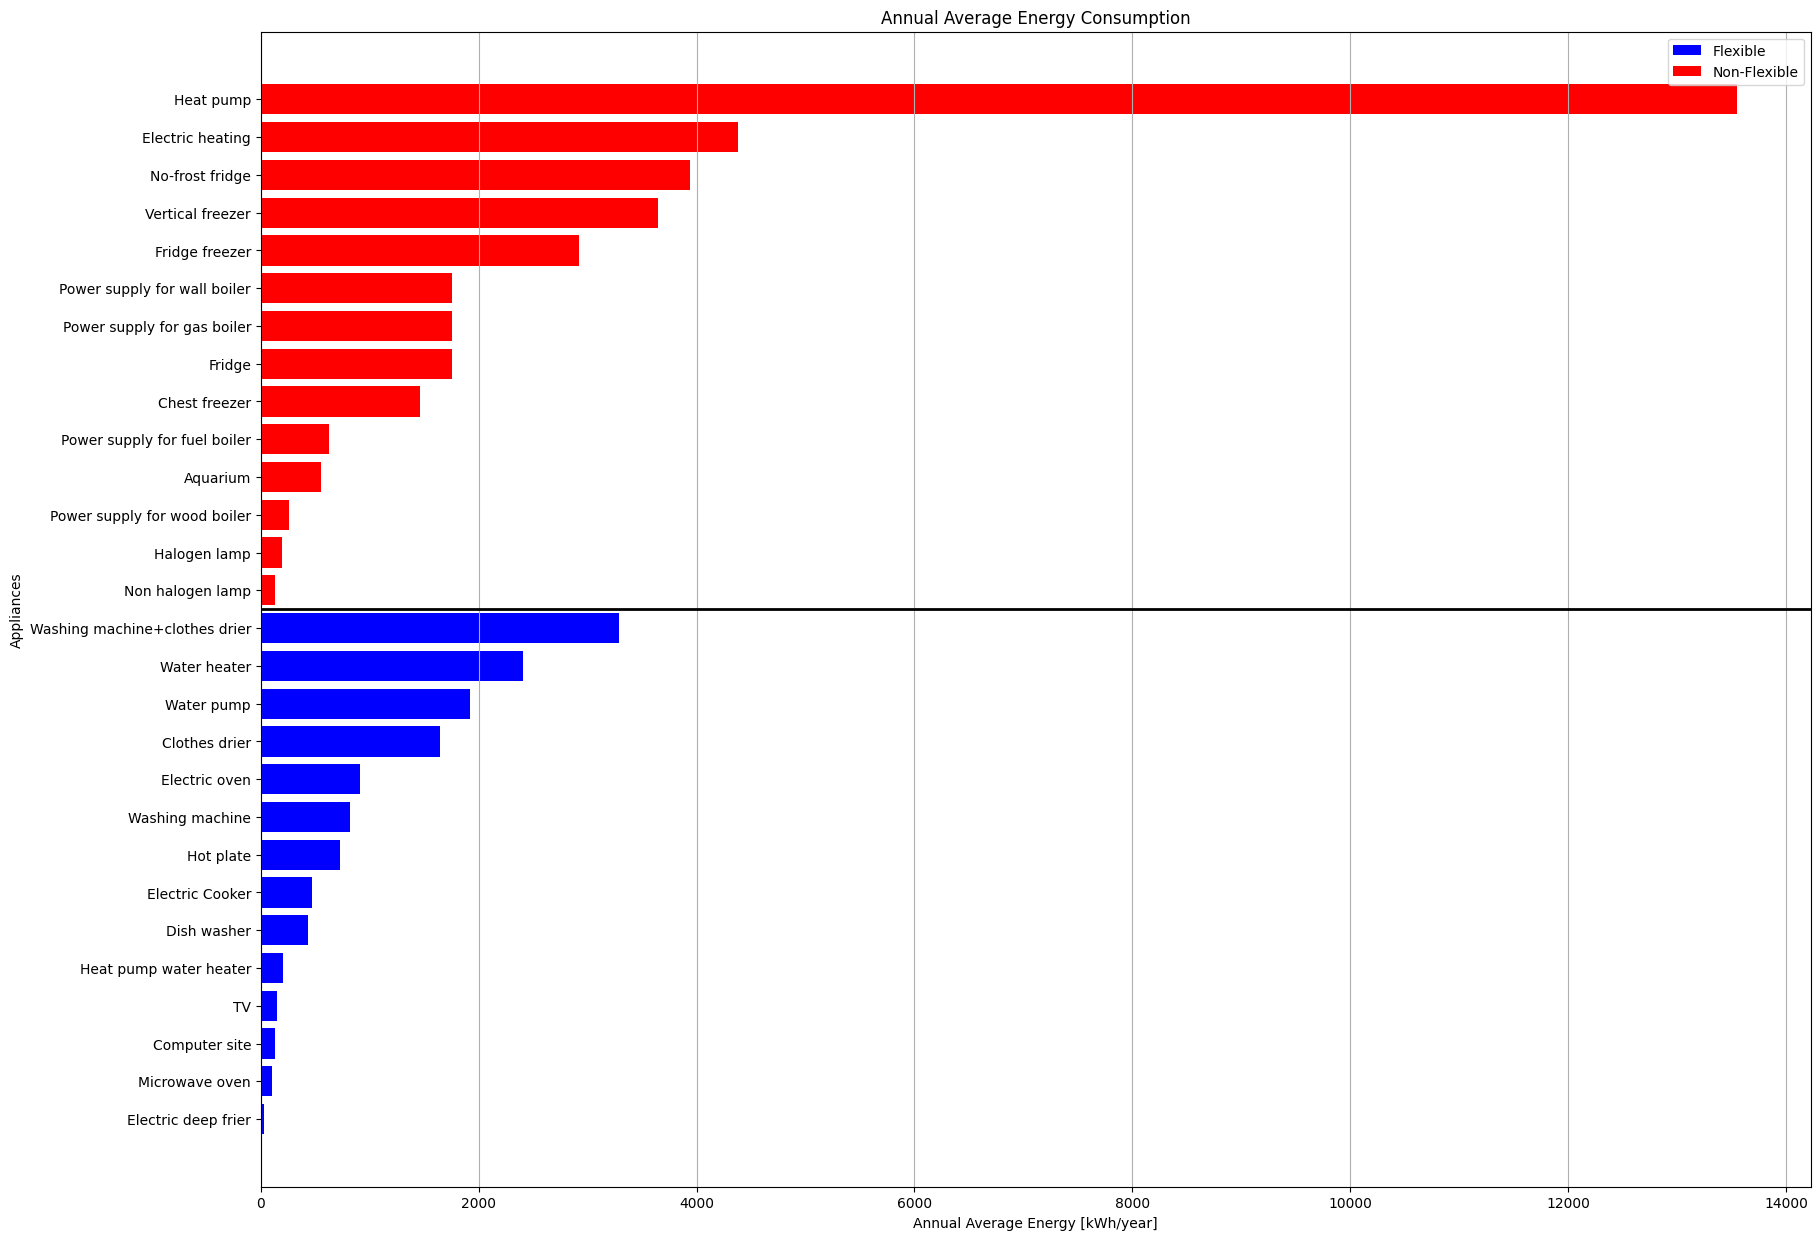

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
df = pd.read_excel(r'D:\Grenoble_university\6_month_internship\working space\data\flex_indicator_general.xlsx', sheet_name='Indicators', skiprows=3, na_values='')

# Drop rows with all NaN values
df = df.dropna(how='all')

# Extract relevant data
appliances = df.columns[1:]  # Exclude the first column
energy = df.iloc[1][1:].astype(float)  # Exclude the first value and convert energy values to float

# Extract flexibility data
flexibility = df.iloc[2][1:]

# Define colors based on flexibility
colors = ['blue' if flex == 'Yes' else 'red' for flex in flexibility]

# Separate flexible and non-flexible appliances
flexible_appliances = [app for app, flex in zip(appliances, flexibility) if flex == 'Yes']
non_flexible_appliances = [app for app, flex in zip(appliances, flexibility) if flex == 'No']

# Sort flexible appliances by energy
sorted_flexible_appliances = sorted(flexible_appliances, key=lambda x: energy[x])

# Sort non-flexible appliances by energy
sorted_non_flexible_appliances = sorted(non_flexible_appliances, key=lambda x: energy[x])

# Create a horizontal bar plot for flexible appliances
plt.figure(figsize=(20, 15))
plt.barh(sorted_flexible_appliances, energy[sorted_flexible_appliances], color='blue')

# Add a black line to separate flexible and non-flexible appliances
plt.axhline(y=len(sorted_flexible_appliances)-0.5, color='black', linewidth=2)

# Create a horizontal bar plot for non-flexible appliances
plt.barh(sorted_non_flexible_appliances, energy[sorted_non_flexible_appliances], color='red')

# Add labels and title
plt.xlabel('Annual Average Energy [kWh/year]')
plt.ylabel('Appliances')
plt.title('Annual Average Energy Consumption')

# Add legend for flexibility
flexible_patch = plt.Rectangle((0,0),1,1,fc="blue", edgecolor = 'none')
non_flexible_patch = plt.Rectangle((0,0),1,1,fc='red',  edgecolor = 'none')
plt.legend([flexible_patch, non_flexible_patch], ['Flexible', 'Non-Flexible'], loc='upper right')

# Show the plot
plt.grid(axis='x')
plt.show()


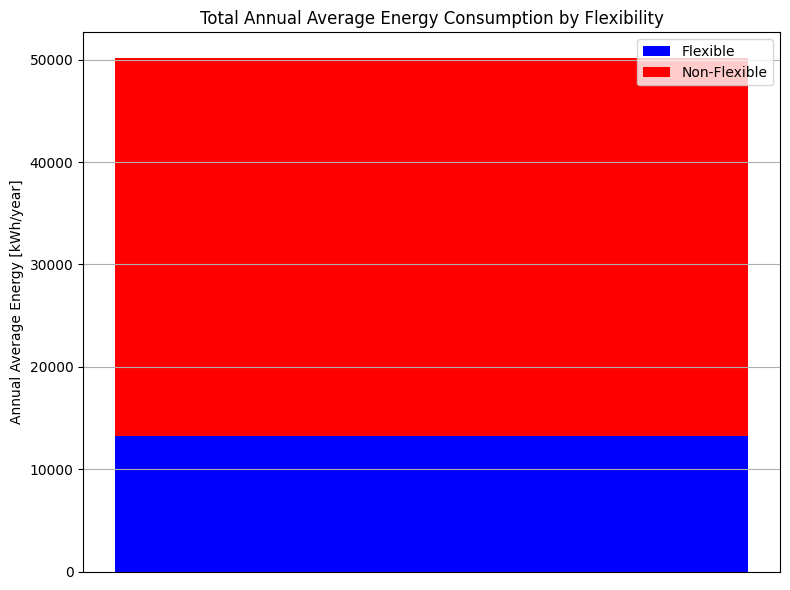

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data
df = pd.read_excel(r'D:\Grenoble_university\6_month_internship\working space\data\flex_indicator_general.xlsx', sheet_name='Indicators', skiprows=3, na_values='')

# Drop rows with all NaN values
df = df.dropna(how='all')

# Extract relevant data
appliances = df.columns[1:]  # Exclude the first column
energy = df.iloc[1][1:].astype(float)  # Exclude the first value and convert energy values to float

# Extract flexibility data
flexibility = df.iloc[2][1:]

# Define colors based on flexibility
colors = ['blue' if flex == 'Yes' else 'red' for flex in flexibility]

# Calculate the sum of annual average energy for flexible and non-flexible appliances
total_flexible_energy = sum(energy[flexibility == 'Yes'])
total_non_flexible_energy = sum(energy[flexibility == 'No'])

# Create a combined stacked bar plot
plt.figure(figsize=(8, 6))

# Plot flexible appliances' energy consumption
plt.bar(np.arange(1), total_flexible_energy, color='blue', label='Flexible')

# Plot non-flexible appliances' energy consumption on top of flexible
plt.bar(np.arange(1), total_non_flexible_energy, bottom=total_flexible_energy, color='red', label='Non-Flexible')

# Add labels and title
plt.ylabel('Annual Average Energy [kWh/year]')
plt.xticks([])
plt.title('Total Annual Average Energy Consumption by Flexibility')

# Add legend
plt.legend()

# Show the plot
plt.grid(axis='y')
plt.tight_layout()
plt.show()


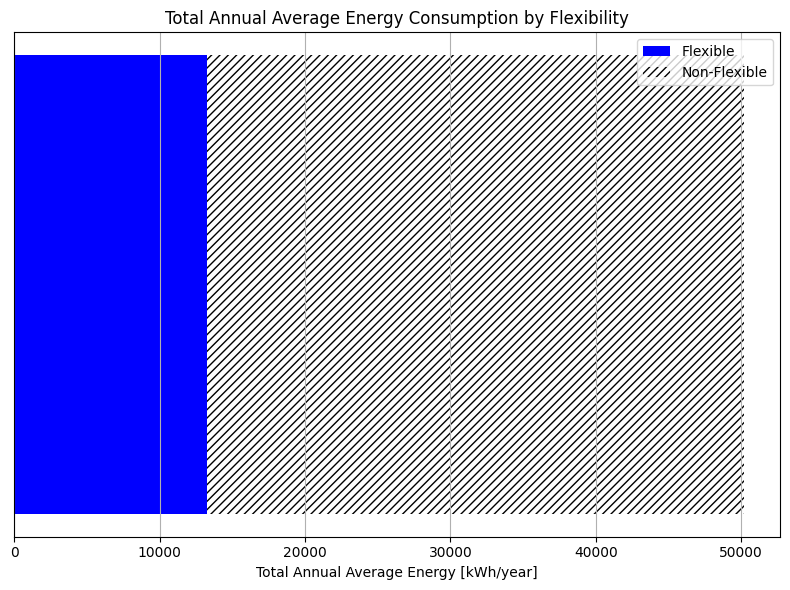

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
df = pd.read_excel(r'D:\Grenoble_university\6_month_internship\working space\data\flex_indicator_general.xlsx', sheet_name='Indicators', skiprows=3, na_values='')

# Drop rows with all NaN values
df = df.dropna(how='all')

# Extract relevant data
appliances = df.columns[1:]  # Exclude the first column
energy = df.iloc[1][1:].astype(float)  # Exclude the first value and convert energy values to float

# Extract flexibility data
flexibility = df.iloc[2][1:]

# Calculate the sum of annual average energy for flexible and non-flexible appliances
total_flexible_energy = sum(energy[flexibility == 'Yes'])
total_non_flexible_energy = sum(energy[flexibility == 'No'])

# Plot the empathy bottle
plt.figure(figsize=(8, 6))

# Plot the flexible energy as filled portion
plt.barh(0, total_flexible_energy, color='blue', label='Flexible')
# Plot the non-flexible energy as empty portion on top
plt.barh(0, total_non_flexible_energy, color='white', left=total_flexible_energy, hatch='////', label='Non-Flexible')

# Add labels and title
plt.xlabel('Total Annual Average Energy [kWh/year]')
plt.yticks([])
plt.title('Total Annual Average Energy Consumption by Flexibility')

# Add legend
plt.legend()

# Show the plot
plt.grid(axis='x')
plt.tight_layout()
plt.show()


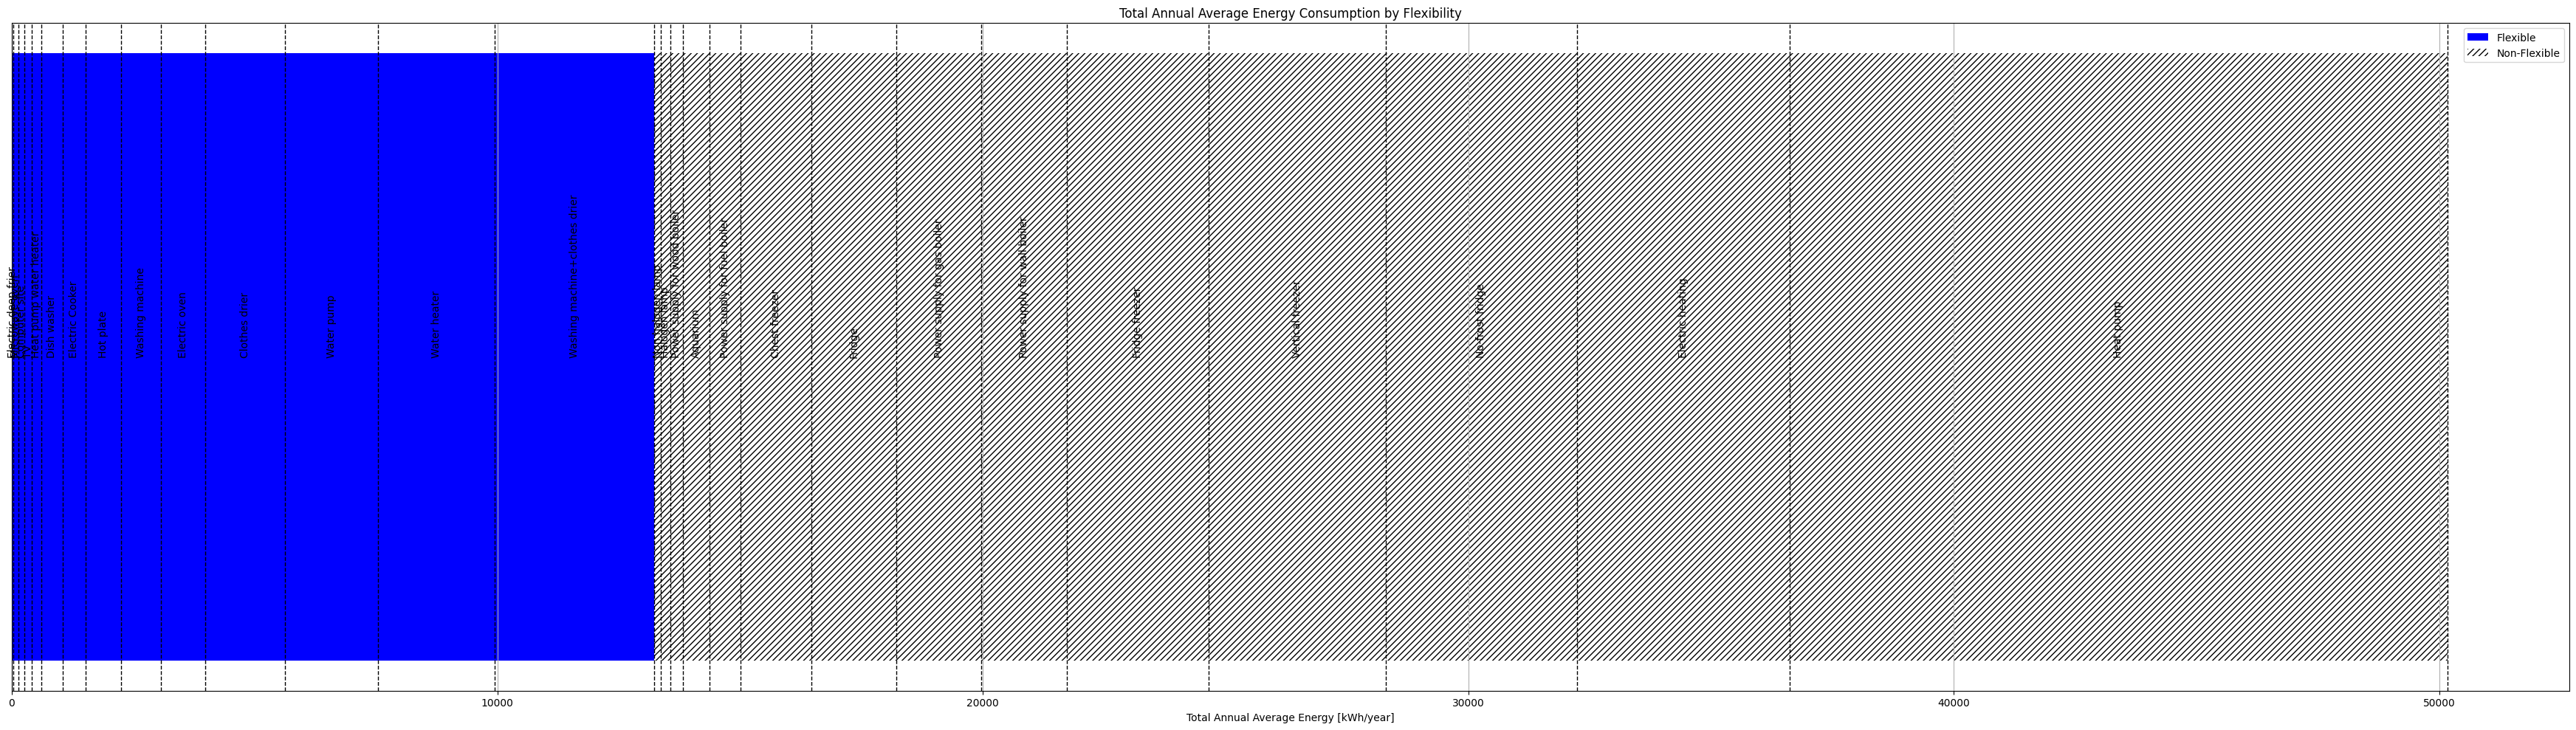

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
df = pd.read_excel(r'D:\Grenoble_university\6_month_internship\working space\data\flex_indicator_general.xlsx', sheet_name='Indicators', skiprows=3, na_values='')

# Drop rows with all NaN values
df = df.dropna(how='all')

# Extract relevant data
appliances = df.columns[1:]  # Exclude the first column
energy = df.iloc[1][1:].astype(float)  # Exclude the first value and convert energy values to float
flexibility = df.iloc[2][1:]  # Extract flexibility data

# Separate flexible and non-flexible appliances
flexible_appliances = energy[flexibility == 'Yes'].sort_values()
non_flexible_appliances = energy[flexibility == 'No'].sort_values()

# Total energy consumption for flexible and non-flexible appliances
total_flexible_energy = flexible_appliances.sum()
total_non_flexible_energy = non_flexible_appliances.sum()

# Arrange flexible appliances from smallest to largest energy consumption
flexible_appliances = flexible_appliances.sort_values()

# Plot the empty bottle diagram
plt.figure(figsize=(35, 10))

# Plot flexible appliances in blue
for i, (app, energy) in enumerate(flexible_appliances.items()):
    plt.barh(0, energy, color='blue', left=flexible_appliances.iloc[:i].sum(), label='Flexible' if i == 0 else None)
    plt.text(flexible_appliances.iloc[:i].sum() + energy / 2, 0, app, ha='center', va='bottom', color='black', rotation=90)

# Plot non-flexible appliances without color (empty)
for i, (app, energy) in enumerate(non_flexible_appliances.items()):
    plt.barh(0, energy, color='none', left=total_flexible_energy + non_flexible_appliances.iloc[:i].sum(), label='Non-Flexible' if i == 0 else None, hatch='////')
    plt.text(total_flexible_energy + non_flexible_appliances.iloc[:i].sum() + energy / 2, 0, app, ha='center', va='bottom', color='black', rotation=90)

# Add lines for each appliance's energy consumption, starting with flexible
cumulative_energy_flexible = 0
for i, (app, energy) in enumerate(flexible_appliances.items()):
    cumulative_energy_flexible += energy
    plt.axvline(x=cumulative_energy_flexible, color='black', linestyle='--', linewidth=1)  # Darker black line

# Add lines for non-flexible appliances
cumulative_energy_non_flexible = 0
for i, (app, energy) in enumerate(non_flexible_appliances.items()):
    cumulative_energy_non_flexible += energy
    plt.axvline(x=total_flexible_energy + cumulative_energy_non_flexible, color='black', linestyle='--', linewidth=1)  # Darker black line

# Add labels and title
plt.xlabel('Total Annual Average Energy [kWh/year]')
plt.yticks([])
plt.title('Total Annual Average Energy Consumption by Flexibility')

# Add legend
plt.legend()

# Show the plot
plt.grid(axis='x')
plt.tight_layout()
plt.show()


C:\Users\MSI\AppData\Local\Temp\ipykernel_17100\3191917551.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df.iloc[2][i] == 'Yes':  # Check if the appliance is flexible
C:\Users\MSI\AppData\Local\Temp\ipykernel_17100\3191917551.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df.iloc[2][i] == 'No':  # Check if the appliance is non-flexible


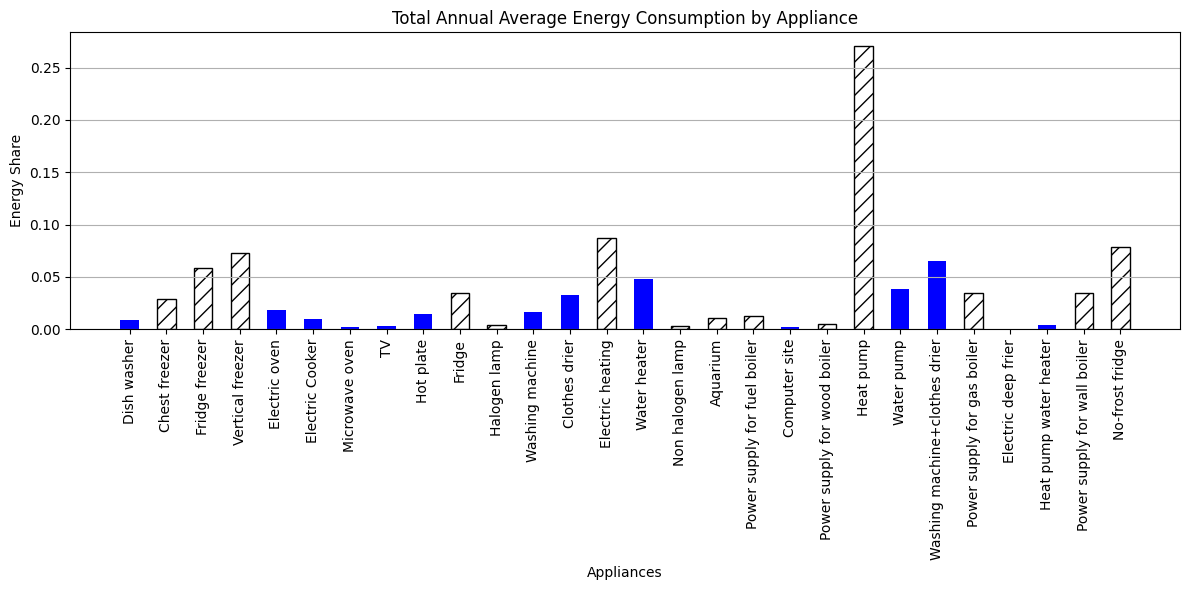

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
df = pd.read_excel(r'D:\Grenoble_university\6_month_internship\working space\data\flex_indicator_general.xlsx', sheet_name='Indicators', skiprows=3, na_values='')

# Drop rows with all NaN values
df = df.dropna(how='all')

# Extract relevant data
appliances = df.columns[1:]  # Exclude the first column
energy = df.iloc[1][1:].astype(float)  # Exclude the first value and convert energy values to float

# Calculate the total energy consumption
total_energy = energy.sum()

# Calculate the energy per part for each appliance
energy_per_part = energy / total_energy

# Split the x-axis into 28 parts
x_values = range(28)

# Plot the empathy bottle
plt.figure(figsize=(12, 6))

# Plot flexible appliances
for i, (app, energy_part) in enumerate(zip(appliances, energy_per_part), 1):
    if df.iloc[2][i] == 'Yes':  # Check if the appliance is flexible
        plt.bar(x=i, height=energy_part, color='blue', width=0.5)

# Plot non-flexible appliances
for i, (app, energy_part) in enumerate(zip(appliances, energy_per_part), 1):
    if df.iloc[2][i] == 'No':  # Check if the appliance is non-flexible
        plt.bar(x=i, height=energy_part, color='white', width=0.5, edgecolor='black', hatch='//')

# Add labels and title
plt.xlabel('Appliances')
plt.ylabel('Energy Share')
plt.title('Total Annual Average Energy Consumption by Appliance')

# Add appliance names to x-axis
plt.xticks(range(1, len(appliances) + 1), appliances, rotation=90)

# Show the plot
plt.grid(axis='y')
plt.tight_layout()
plt.show()



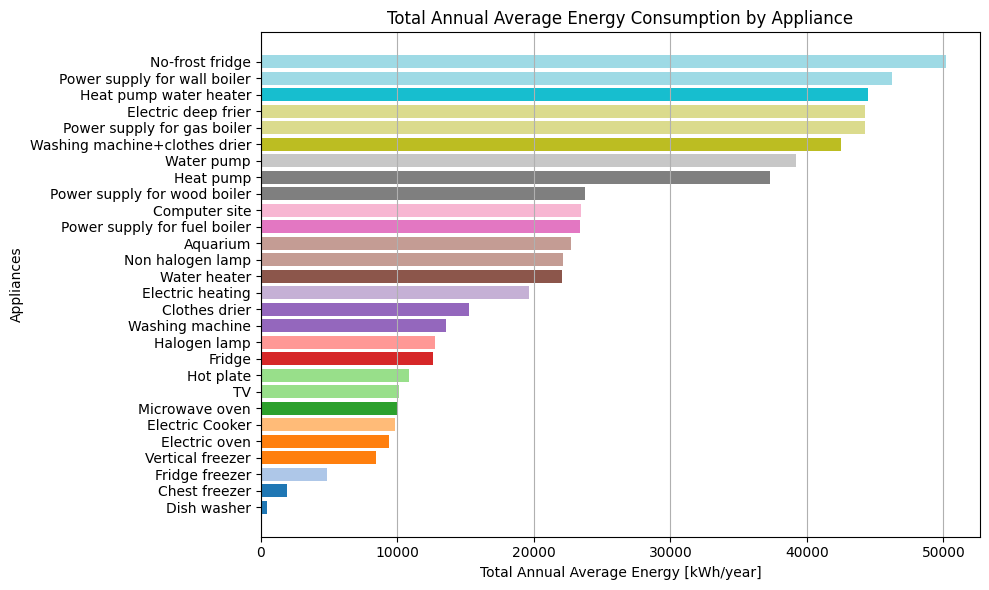

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data
df = pd.read_excel(r'D:\Grenoble_university\6_month_internship\working space\data\flex_indicator_general.xlsx', sheet_name='Indicators', skiprows=3, na_values='')

# Drop rows with all NaN values
df = df.dropna(how='all')

# Extract relevant data
appliances = df.columns[1:]  # Exclude the first column
energy = df.iloc[1][1:].astype(float)  # Exclude the first value and convert energy values to float

# Calculate the cumulative sum of annual average energy for each appliance
cumulative_energy = energy.cumsum()

# Plot the empty bottle diagram
plt.figure(figsize=(10, 6))

# Define colors for each appliance
colors = plt.cm.tab20(np.linspace(0, 1, len(appliances)))

# Plot the sections of the bottle
for i, (appliance, cum_energy) in enumerate(zip(appliances, cumulative_energy)):
    plt.barh(appliance, cum_energy, color=colors[i])

# Add labels and title
plt.xlabel('Total Annual Average Energy [kWh/year]')
plt.ylabel('Appliances')
plt.title('Total Annual Average Energy Consumption by Appliance')

# Show the plot
plt.grid(axis='x')
plt.tight_layout()
plt.show()


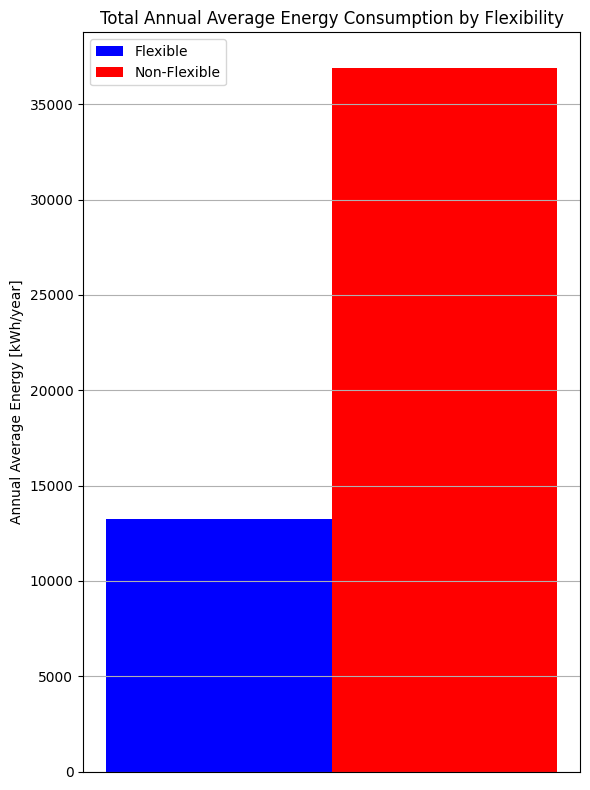

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data
df = pd.read_excel(r'D:\Grenoble_university\6_month_internship\working space\data\flex_indicator_general.xlsx', sheet_name='Indicators', skiprows=3, na_values='')

# Drop rows with all NaN values
df = df.dropna(how='all')

# Extract relevant data
appliances = df.columns[1:]  # Exclude the first column
energy = df.iloc[1][1:].astype(float)  # Exclude the first value and convert energy values to float

# Extract flexibility data
flexibility = df.iloc[2][1:]

# Define colors based on flexibility
colors = ['blue' if flex == 'Yes' else 'red' for flex in flexibility]

# Calculate the sum of annual average energy for flexible and non-flexible appliances
total_flexible_energy = sum(energy[flexibility == 'Yes'])
total_non_flexible_energy = sum(energy[flexibility == 'No'])

# Create a combined stacked bar plot
plt.figure(figsize=(6, 8))

# Set bar width
bar_width = 0.4

# Set x positions for the bars
x_positions = np.arange(1)

# Plot flexible appliances' energy consumption
plt.bar(x_positions - bar_width/2, [total_flexible_energy], width=bar_width, color='blue', label='Flexible')

# Plot non-flexible appliances' energy consumption on top of flexible
plt.bar(x_positions + bar_width/2, [total_non_flexible_energy], width=bar_width, color='red', label='Non-Flexible')

# Add labels and title
plt.ylabel('Annual Average Energy [kWh/year]')
plt.xticks([])
plt.title('Total Annual Average Energy Consumption by Flexibility')

# Add legend
plt.legend()

# Show the plot
plt.grid(axis='y')
plt.tight_layout()
plt.show()


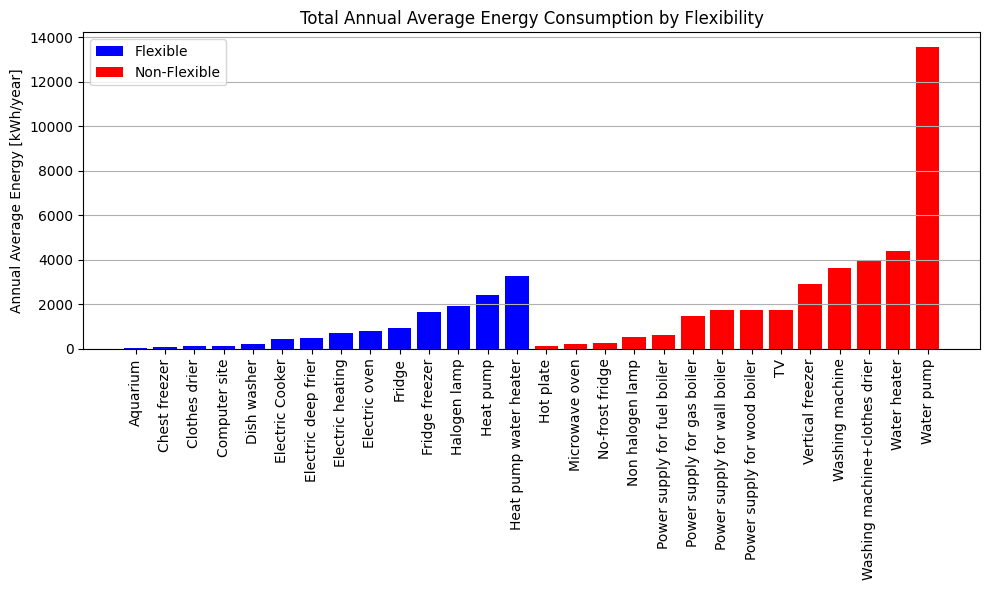

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data
df = pd.read_excel(r'D:\Grenoble_university\6_month_internship\working space\data\flex_indicator_general.xlsx', sheet_name='Indicators', skiprows=3, na_values='')

# Drop rows with all NaN values
df = df.dropna(how='all')

# Extract relevant data
appliances = df.columns[1:]  # Exclude the first column
energy = df.iloc[1][1:].astype(float)  # Exclude the first value and convert energy values to float

# Extract flexibility data
flexibility = df.iloc[2][1:]

# Sort appliances by energy consumption
sorted_indices = np.argsort(energy)

# Sort appliances and energy consumption accordingly
sorted_energy = energy.iloc[sorted_indices]
sorted_flexibility = flexibility.iloc[sorted_indices]

# Calculate the sum of annual average energy for flexible and non-flexible appliances
total_flexible_energy = sum(sorted_energy[sorted_flexibility == 'Yes'])
total_non_flexible_energy = sum(sorted_energy[sorted_flexibility == 'No'])

# Create a combined staircase-like bar plot
plt.figure(figsize=(10, 6))

# Plot flexible appliances' energy consumption
flexible_energy = sorted_energy[sorted_flexibility == 'Yes']
plt.bar(np.arange(len(flexible_energy)), flexible_energy, color='blue', label='Flexible')

# Plot non-flexible appliances' energy consumption on top of flexible
non_flexible_energy = sorted_energy[sorted_flexibility == 'No']
plt.bar(np.arange(len(flexible_energy), len(flexible_energy) + len(non_flexible_energy)), non_flexible_energy, color='red', label='Non-Flexible')

# Add labels and title
plt.ylabel('Annual Average Energy [kWh/year]')
plt.xticks(range(len(appliances)), sorted(appliances), rotation=90)
plt.title('Total Annual Average Energy Consumption by Flexibility')

# Add legend
plt.legend()

# Show the plot
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import plotly.graph_objs as go

# Load the Excel file with the correct sheet name
file_path = r'D:\Grenoble_university\6_month_internship\working space\data\flex_indicator_general.xlsx'
df = pd.read_excel(file_path, sheet_name='Indicators', skiprows=1)

# Set the correct headers and reset the DataFrame
df.columns = df.iloc[0]
df = df[1:]

# Extract the required data
appliances = df.columns[1:].values
power = pd.to_numeric(df.iloc[1, 1:], errors='coerce').values
energy = pd.to_numeric(df.iloc[2, 1:], errors='coerce').values

# Get the appliance names from row 4
appliance_names = df.iloc[0, 1:].values

# Check for any NaN values and filter them out
mask = ~pd.isna(power) & ~pd.isna(energy)
appliances = appliance_names[mask]  # Use appliance names from row 4
power = power[mask]
energy = energy[mask]

# Create a scatter plot
fig = go.Figure()

# Add scatter trace for appliances
scatter_traces = []
for i in range(len(appliances)):
    hover_text = f"Appliance: {appliances[i]}<br>Power: {power[i]} W<br>Energy: {energy[i]} kWh/year"
    scatter_trace = go.Scatter(
        x=[energy[i]], 
        y=[power[i]], 
        mode='markers', 
        marker=dict(color='blue'), 
        name=appliances[i],
        text=hover_text, 
        hoverinfo='text'
    )
    fig.add_trace(scatter_trace)
    scatter_traces.append(scatter_trace)

# Add lines connecting each point to the x and y axes
line_traces = []
for i in range(len(appliances)):
    vertical_line_trace = go.Scatter(x=[energy[i], energy[i]], y=[0, power[i]], mode='lines', line=dict(color='black'), showlegend=False, name=f'Line_{i}_v')
    horizontal_line_trace = go.Scatter(x=[0, energy[i]], y=[power[i], power[i]], mode='lines', line=dict(color='black'), showlegend=False, name=f'Line_{i}_h')
    fig.add_trace(vertical_line_trace)  # Vertical line to x-axis
    fig.add_trace(horizontal_line_trace)  # Horizontal line to y-axis
    line_traces.extend([vertical_line_trace, horizontal_line_trace])

# Set layout
fig.update_layout(
    title='Average Power vs. Annual Energy Spent for Each Appliance',
    xaxis=dict(title='Annual Energy Spent [kWh/year]'),
    yaxis=dict(title='Average Appliance Power [W]'),
    hovermode='closest',
    height=750,
    width=1600,
    margin=dict(l=50, r=50, t=50, b=50),
    showlegend=True,
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=list([
                dict(
                    args=["visible", [True if not trace.name.startswith('Line_') else False for trace in fig.data]],
                    label="Hide Lines",
                    method="restyle"
                ),
                dict(
                    args=["visible", [True for trace in fig.data]],
                    label="Show Lines",
                    method="restyle"
                ),
            ]),
            pad={"r": 10, "t": 10},
            showactive=True,
            x=1.5,  # Move buttons to the right side of the graph
            xanchor="right",
            y=1.08,
            yanchor="top"
        ),
    ]
)

# Show the plot
fig.show()
